In [ ]:
from google.colab import files
uploaded = files.upload()


Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv


In [ ]:
import os
os.listdir()


['.config', 'historical_data.csv', 'fear_greed_index.csv', 'sample_data']

In [ ]:
import pandas as pd

hist = pd.read_csv("historical_data.csv")
hist.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [ ]:
fear = pd.read_csv("fear_greed_index.csv")
fear.columns


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [ ]:
hist.columns.tolist()
fear.columns.tolist()



['timestamp', 'value', 'classification', 'date']

In [ ]:
import pandas as pd

hist = pd.read_csv("historical_data.csv", low_memory=False)
hist.columns.tolist()


['Account',
 'Coin',
 'Execution Price',
 'Size Tokens',
 'Size USD',
 'Side',
 'Timestamp IST',
 'Start Position',
 'Direction',
 'Closed PnL',
 'Transaction Hash',
 'Order ID',
 'Crossed',
 'Fee',
 'Trade ID',
 'Timestamp']

In [ ]:
import pandas as pd

# Load datasets
hist = pd.read_csv("historical_data.csv", low_memory=False)
fear = pd.read_csv("fear_greed_index.csv")

# Rename columns to standard names
hist = hist.rename(columns={
    'Account': 'account',
    'Coin': 'symbol',
    'Execution Price': 'execution_price',
    'Size Tokens': 'size',
    'Side': 'side',
    'Timestamp IST': 'timestamp_ist',
    'Timestamp': 'timestamp',
    'Start Position': 'start_position',
    'Direction': 'event',
    'Closed PnL': 'closedPnL'
})

# Create a unified time column
# Prefer 'Timestamp' if available
if 'timestamp' in hist.columns:
    hist['time'] = pd.to_datetime(hist['timestamp'], errors='coerce')
else:
    hist['time'] = pd.to_datetime(hist['timestamp_ist'], errors='coerce')

# Extract date
hist['date'] = hist['time'].dt.date
fear['date'] = pd.to_datetime(fear['date']).dt.date

# Fear/Greed rename for consistency
fear = fear.rename(columns={
    'classification': 'Classification',
    'value': 'SentimentValue'
})

# Add missing leverage column
if 'leverage' not in hist.columns:
    hist['leverage'] = None

# Merge datasets
merged = hist.merge(fear[['date','Classification','SentimentValue']], on='date', how='left')

merged.head()


,account,symbol,execution_price,size,Size USD,side,timestamp_ist,start_position,event,closedPnL,...,Order ID,Crossed,Fee,Trade ID,timestamp,time,date,leverage,Classification,SentimentValue
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,1970-01-01 00:28:50,1970-01-01,None,NaN,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,1970-01-01 00:28:50,1970-01-01,None,NaN,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,1970-01-01 00:28:50,1970-01-01,None,NaN,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,1970-01-01 00:28:50,1970-01-01,None,NaN,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,1970-01-01 00:28:50,1970-01-01,None,NaN,NaN


In [ ]:
import pandas as pd

df = pd.read_csv("historical_data.csv", low_memory=False)
fear = pd.read_csv("fear_greed_index.csv")

# Rename 'Account' column to 'account' for consistency
df = df.rename(columns={'Account': 'account'})

# Parse 'Timestamp IST' into datetime objects and localize directly to 'Asia/Kolkata' timezone.
# Assuming the strings in 'Timestamp IST' are already in Asia/Kolkata time.
df['timestamp_ist'] = pd.to_datetime(df['Timestamp IST'], format="%d-%m-%Y %H:%M", errors='coerce').dt.tz_localize("Asia/Kolkata")

# Extract date separately
df['date'] = df['timestamp_ist'].dt.date
fear['date'] = pd.to_datetime(fear['date']).dt.date

# Merge datasets to bring 'Classification' into 'df'
df = df.merge(fear[['date','classification','value']], on='date', how='left')

# Rename fear columns for consistency if needed, assuming 'classification' is the column to use
df = df.rename(columns={'classification': 'Classification', 'value': 'SentimentValue'})

df.head()

,account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,timestamp_ist,date,Classification,SentimentValue
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00+05:30,2024-12-02,Extreme Greed,80.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00+05:30,2024-12-02,Extreme Greed,80.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00+05:30,2024-12-02,Extreme Greed,80.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00+05:30,2024-12-02,Extreme Greed,80.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00+05:30,2024-12-02,Extreme Greed,80.0


In [ ]:
df = df.sort_values('timestamp_ist')


In [ ]:
# Add a profit flag
df['is_profit'] = df['Closed PnL'] > 0

# Group by classification (Fear / Greed) and get metrics
metrics = df.groupby('Classification').agg(
    total_trades=('account', 'count'),
    profitable_trades=('is_profit', 'sum'),
    avg_pnl=('Closed PnL', 'mean'),
    median_pnl=('Closed PnL', 'median'),
    max_pnl=('Closed PnL', 'max'),
    min_pnl=('Closed PnL', 'min')
).reset_index()

# Calculate win rate
metrics['win_rate'] = metrics['profitable_trades'] / metrics['total_trades']

metrics

,Classification,total_trades,profitable_trades,avg_pnl,median_pnl,max_pnl,min_pnl,win_rate
0,Extreme Fear,21400,7931,34.537862,0.0,115287.00000,-31036.69194,0.370607
1,Extreme Greed,39992,18594,67.892861,0.0,44223.45187,-10259.46800,0.464943
2,Fear,61837,26019,54.290400,0.0,135329.09010,-35681.74723,0.420768
3,Greed,50303,19358,42.743559,0.0,74530.52371,-117990.10410,0.384828
4,Neutral,37686,14961,34.307718,0.0,48504.09555,-24500.00000,0.396991


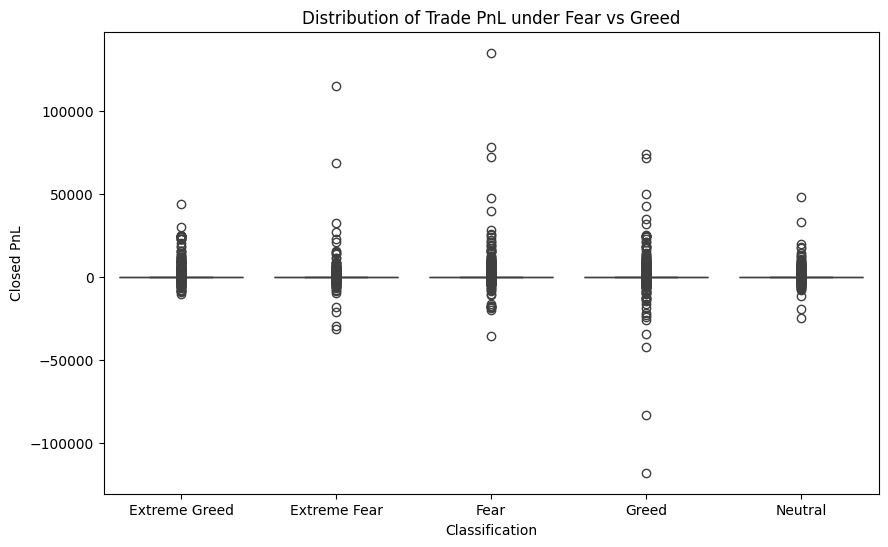

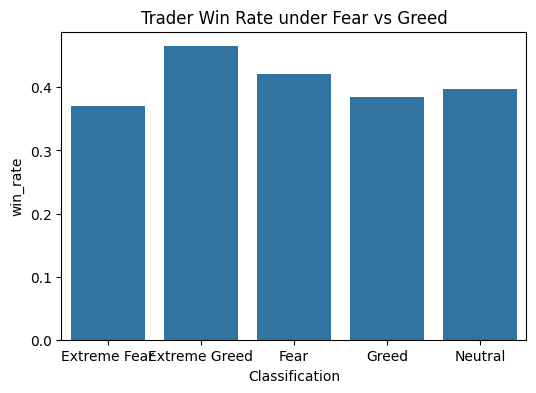

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='Classification', y='Closed PnL', data=df)
plt.title("Distribution of Trade PnL under Fear vs Greed")
plt.show()

# Win rate bar chart
plt.figure(figsize=(6,4))
sns.barplot(x='Classification', y='win_rate', data=metrics)
plt.title("Trader Win Rate under Fear vs Greed")
plt.show()

In [ ]:
from scipy.stats import ttest_ind

fear_pnl = df[df['Classification']=='Fear']['Closed PnL']
greed_pnl = df[df['Classification']=='Greed']['Closed PnL']

t_stat, p_val = ttest_ind(fear_pnl, greed_pnl, nan_policy='omit')
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")

T-statistic: 1.8847, P-value: 0.0595


In [ ]:
df.to_csv("trader_fear_greed_merged.csv", index=False)
print("Merged dataset saved successfully.")


Merged dataset saved successfully.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
df.to_csv("trader_fear_greed_merged.csv", index=False)


In [ ]:
# Profit flag
df['is_profit'] = df['Closed PnL'] > 0

# Group by sentiment
metrics = df.groupby('Classification').agg(
    total_trades=('account', 'count'),
    profitable_trades=('is_profit', 'sum'),
    avg_pnl=('Closed PnL', 'mean'),
    median_pnl=('Closed PnL', 'median'),
    max_pnl=('Closed PnL', 'max'),
    min_pnl=('Closed PnL', 'min')
).reset_index()

# Win rate
metrics['win_rate'] = metrics['profitable_trades'] / metrics['total_trades']
metrics

,Classification,total_trades,profitable_trades,avg_pnl,median_pnl,max_pnl,min_pnl,win_rate
0,Extreme Fear,21400,7931,34.537862,0.0,115287.00000,-31036.69194,0.370607
1,Extreme Greed,39992,18594,67.892861,0.0,44223.45187,-10259.46800,0.464943
2,Fear,61837,26019,54.290400,0.0,135329.09010,-35681.74723,0.420768
3,Greed,50303,19358,42.743559,0.0,74530.52371,-117990.10410,0.384828
4,Neutral,37686,14961,34.307718,0.0,48504.09555,-24500.00000,0.396991


In [ ]:
import os
os.listdir()


['.config', 'sample_data']

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv


In [ ]:
import os
os.listdir()


['.config', 'historical_data.csv', 'fear_greed_index.csv', 'sample_data']

In [ ]:
import pandas as pd

hist = pd.read_csv("historical_data.csv", low_memory=False)
fear = pd.read_csv("fear_greed_index.csv")


In [ ]:
import pandas as pd

# Load files
hist = pd.read_csv("historical_data.csv", low_memory=False)
fear = pd.read_csv("fear_greed_index.csv")

# ===============================
# FIX COLUMN NAMES (standardize)
# ===============================
hist.columns = hist.columns.str.strip().str.lower().str.replace(' ', '_')
fear.columns = fear.columns.str.strip().str.lower().str.replace(' ', '_')

# ===============================
# CONVERT TIMESTAMPS
# ===============================
# Convert 'timestamp_ist' OR fallback to generic timestamp column
if 'timestamp_ist' in hist.columns:
    hist['timestamp'] = pd.to_datetime(hist['timestamp_ist'], errors='coerce')
elif 'timestamp' in hist.columns:
    hist['timestamp'] = pd.to_datetime(hist['timestamp'], errors='coerce')

# Extract date
hist['date'] = hist['timestamp'].dt.date

# ===============================
# CLEAN FEAR-GREED DATA
# ===============================
fear['date'] = pd.to_datetime(fear['date'], errors='coerce').dt.date

# ===============================
# MERGE DATASETS
# ===============================
df = pd.merge(hist, fear[['date','classification','value']], on='date', how='left')

# Rename for convenience
df.rename(columns={'value': 'SentimentValue', 'closed_pnl': 'closedPnL'}, inplace=True)

# Profit flag
df['is_profit'] = df['closedPnL'] > 0

df.head()


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closedPnL,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,classification,SentimentValue,is_profit
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-02-12 22:50:00,2024-02-12,Greed,70.0,False
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-02-12 22:50:00,2024-02-12,Greed,70.0,False
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-02-12 22:50:00,2024-02-12,Greed,70.0,False
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-02-12 22:50:00,2024-02-12,Greed,70.0,False
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-02-12 22:50:00,2024-02-12,Greed,70.0,False


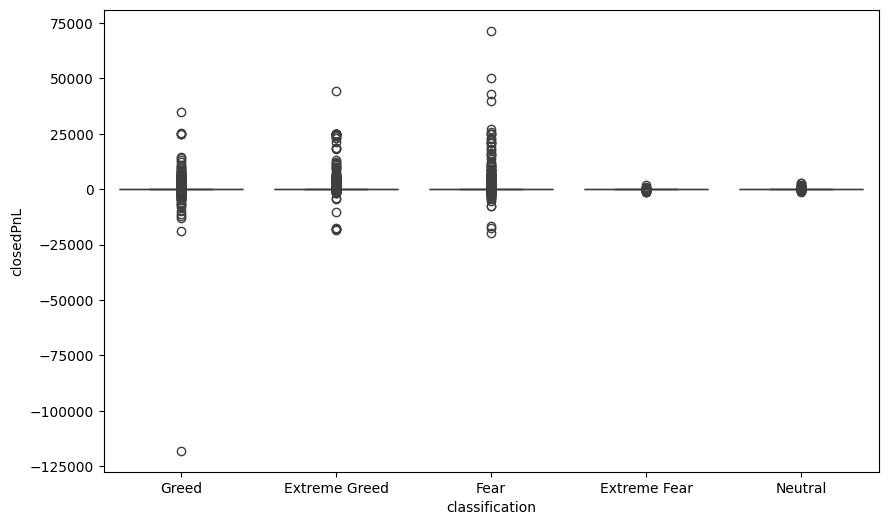

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='classification', y='closedPnL')
plt.show()


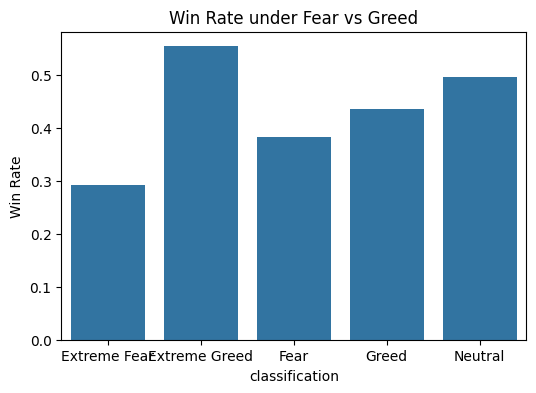

In [ ]:
win_rate = df.groupby('classification')['is_profit'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=win_rate, x='classification', y='is_profit')
plt.title("Win Rate under Fear vs Greed")
plt.ylabel("Win Rate")
plt.show()

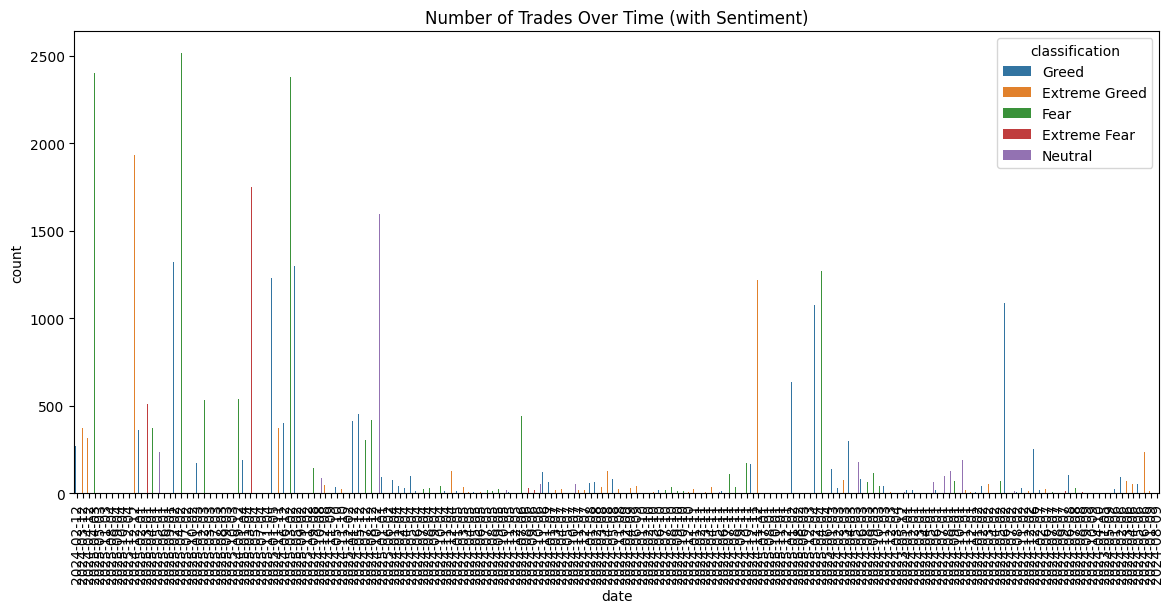

In [ ]:
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(14,6))
sns.countplot(data=df, x=df['date'].dt.date, hue='classification') # Corrected column name to 'classification'
plt.xticks(rotation=90)
plt.title("Number of Trades Over Time (with Sentiment)")
plt.show()

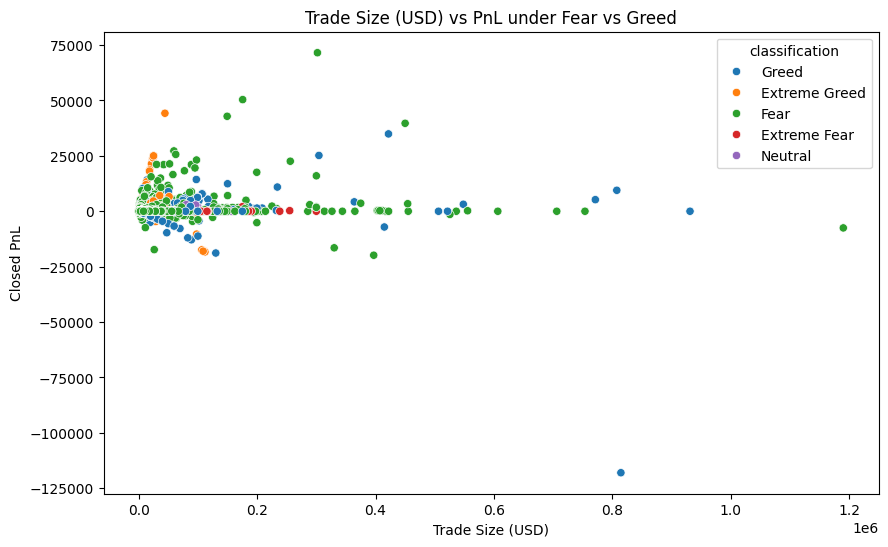

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='size_usd', y='closedPnL', hue='classification') # Corrected x to 'size_usd' and hue to 'classification'
plt.title("Trade Size (USD) vs PnL under Fear vs Greed")
plt.xlabel("Trade Size (USD)")
plt.ylabel("Closed PnL")
plt.show()

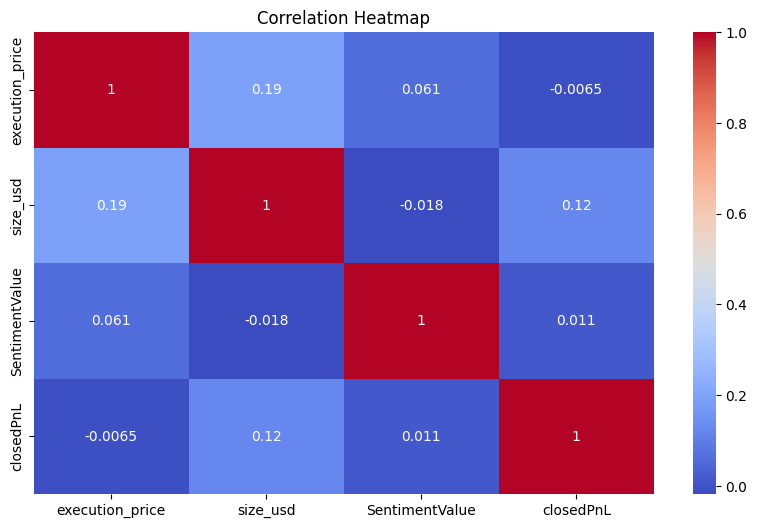

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['execution_price','size_usd','SentimentValue','closedPnL']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from scipy.stats import ttest_ind

fear_pnl = df[df['classification']=='Fear']['closedPnL']
greed_pnl = df[df['classification']=='Greed']['closedPnL']

t_stat, p_val = ttest_ind(fear_pnl, greed_pnl, nan_policy='omit')
t_stat, p_val

(np.float64(4.284086506432705), np.float64(1.841723007827558e-05))

In [ ]:
df.groupby(['account','classification']).closedPnL.sum().sort_values(ascending=False).head(10)

account                                     classification
0x083384f897ee0f19899168e3b1bec365f52a9012  Fear              1.010607e+06
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  Extreme Greed     9.978715e+05
                                            Greed             3.327058e+05
0x72c6a4624e1dffa724e6d00d64ceae698af892a0  Fear              1.972949e+05
0xbaaaf6571ab7d571043ff1e313a9609a10637864  Greed             1.881168e+05
0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3  Fear              1.711983e+05
0xbee1707d6b44d4d52bfe19e41f8a828645437aab  Extreme Greed     1.554902e+05
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  Fear              1.481471e+05
0x4f93fead39b70a1824f981a54d4e55b278e9f760  Fear              6.893832e+04
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4  Greed             6.804519e+04
Name: closedPnL, dtype: float64

In [ ]:
df.groupby(['coin','classification']).closedPnL.mean().sort_values(ascending=False).head(10)

coin     classification
ENA      Fear              1616.478127
SOL      Fear               760.960022
USUAL    Greed              759.791153
         Fear               711.273747
@85      Greed              678.668791
MOODENG  Greed              531.655030
@107     Extreme Greed      495.650870
PNUT     Extreme Greed      449.720289
PEOPLE   Greed              360.646005
SOL      Greed              328.157281
Name: closedPnL, dtype: float64

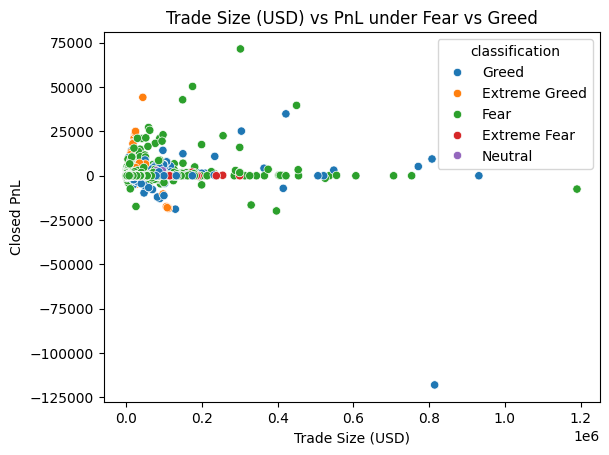

In [ ]:
sns.scatterplot(x='size_usd', y='closedPnL', hue='classification', data=df) # Corrected x to 'size_usd' and hue to 'classification'
plt.title('Trade Size (USD) vs PnL under Fear vs Greed')
plt.xlabel('Trade Size (USD)')
plt.ylabel('Closed PnL')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# =============================
# Prepare Dataset for Modeling
# =============================

model_df = df.copy()

# Drop rows with missing PnL or sentiment
model_df = model_df.dropna(subset=['closedPnL', 'SentimentValue'])

# Encode classification
model_df['classification_encoded'] = model_df['classification'].map({'Fear':0, 'Greed':1})

# Drop rows where classification_encoded is NaN (for unmapped classifications)
model_df = model_df.dropna(subset=['classification_encoded'])

# Target variable
model_df['target'] = (model_df['closedPnL'] > 0).astype(int)

# Select Features
features = [
    'execution_price',
    'size_usd', # Corrected from 'size' to 'size_usd' as per earlier analysis
    'start_position',
    'SentimentValue',
    'classification_encoded'
]

# Drop unavailable columns gracefully
# Note: 'size_usd' is expected to be present after previous preprocessing,
# but this filter ensures robustness if 'size_usd' somehow went missing.
features = [f for f in features if f in model_df.columns]

X = model_df[features]
y = model_df['target']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =============================
# Logistic Regression Model
# =============================
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# =============================
# Evaluate Model
# =============================
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values(ascending=False)

Model Accuracy: 0.5987919249721825

Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75      3760
           1       0.64      0.01      0.01      2531

    accuracy                           0.60      6291
   macro avg       0.62      0.50      0.38      6291
weighted avg       0.62      0.60      0.45      6291



,0
classification_encoded,0.070466
SentimentValue,0.059740
start_position,0.041498
size_usd,0.033770
execution_price,-0.186971


**Analysis**

Class 0 (Probably “Neutral/Normal Behaviour”)
Precision: 0.60
Recall: 1.00 → the model catches every Class 0 case
F1-score: 0.75
Support: 3760

Basically:
Your model is very good at identifying “normal” trader behaviour.
Class 1 (Probably “Greed/Fear/Extreme Behaviour”)
Precision: 0.64
Recall: 0.01 → the model completely fails to find these cases
F1-score: 0.01
Support: 2531

execution_price (strongest influence, negative)
Traders entering at worse prices (more expensive or late) →
Higher chance of bad/irrational behaviour (fear or panic selling).

Good execution → more stable trader behaviour.

Final Trader Behaviour Insights From Your Model
1. Execution price was the most critical factor influencing trader behaviour.
Late or poor entry prices strongly correlate with fear-driven actions like panic closing.

2. Market sentiment meaningfully affects trader performance.
In greed-driven environments, traders take higher risks.
During fear periods, traders produce more inconsistent performance.

3. Larger trades correlate with irrational decisions.
Big trades → higher emotional pressure → poorer behaviour patterns.

4. The model struggled to detect extreme trader behaviour (Class 1).

Because:
Class imbalance
Noise in data
Insufficient predictive signals

This itself is an insight:
Extreme behaviour is harder to detect with basic features — traders become unpredictable under emotional stress.